In [1]:
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
from openpyxl.styles import PatternFill
import pandas as pd

table = pd.read_csv(r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\Plots\PLSR Axes and Morph loadings 0.05 quantile.csv")
table.head()

,Feature,Dev. Dim 1,Dev. Dim 2,Axes Dim 1,Axes Dim 2
0,048h-[Area]-BF,-0.010752,-0.176405,0.013635,0.101492
1,048h-[Axis Minor Length]-BF,-0.003878,-0.175573,-0.002855,0.069923
2,048h-[Perimeter]-BF,-0.011610,-0.173988,0.016211,0.099767
3,048h-[str Area]-BF,-0.010123,-0.175414,0.012668,0.099994
4,048h-[str Equivalent Diameter]-BF,-0.010006,-0.175640,0.012238,0.099746


In [8]:
# Create a new Excel writer object
excel_path = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\tabular_data\PLSR Axes and Morph loadings 0.05 quantile.xlsx"


# Function to convert a matplotlib color to an Excel-compatible color
def rgb_to_excel_color(rgb):
    return "{:02X}{:02X}{:02X}".format(int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))

# Get min and max values for normalization
min_value = -0.22
max_value = 0.22

# Create a colormap (PRGn)
cmap = plt.get_cmap('PRGn')

# Re-open the Excel file to apply colormap
book = openpyxl.load_workbook(excel_path)
sheet = book.active

# Apply the colormap to cells
for column in ['B', 'C','D','E']:
    for row in range(2, len(table) + 2):  # Excel is 1-indexed; skip the header row
        cell = f"{column}{row}"
        value = sheet[cell].value
        
        # Normalize the value
        normalized_value = (value - min_value) / (max_value - min_value)
        
        # Get the color from the colormap
        rgba = cmap(normalized_value)
        
        # Apply the color to the cell
        fill = PatternFill(start_color=rgb_to_excel_color(rgba[:3]),
                           end_color=rgb_to_excel_color(rgba[:3]), fill_type="solid")
        sheet[cell].fill = fill
        
        # Make text grey
        sheet[cell].font = openpyxl.styles.Font(color='000000')

# Save the changes
out_path = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\tabular_data\PLSR Axes and Morph loadings 0.05 quantile colored.xlsx"
book.save(out_path)

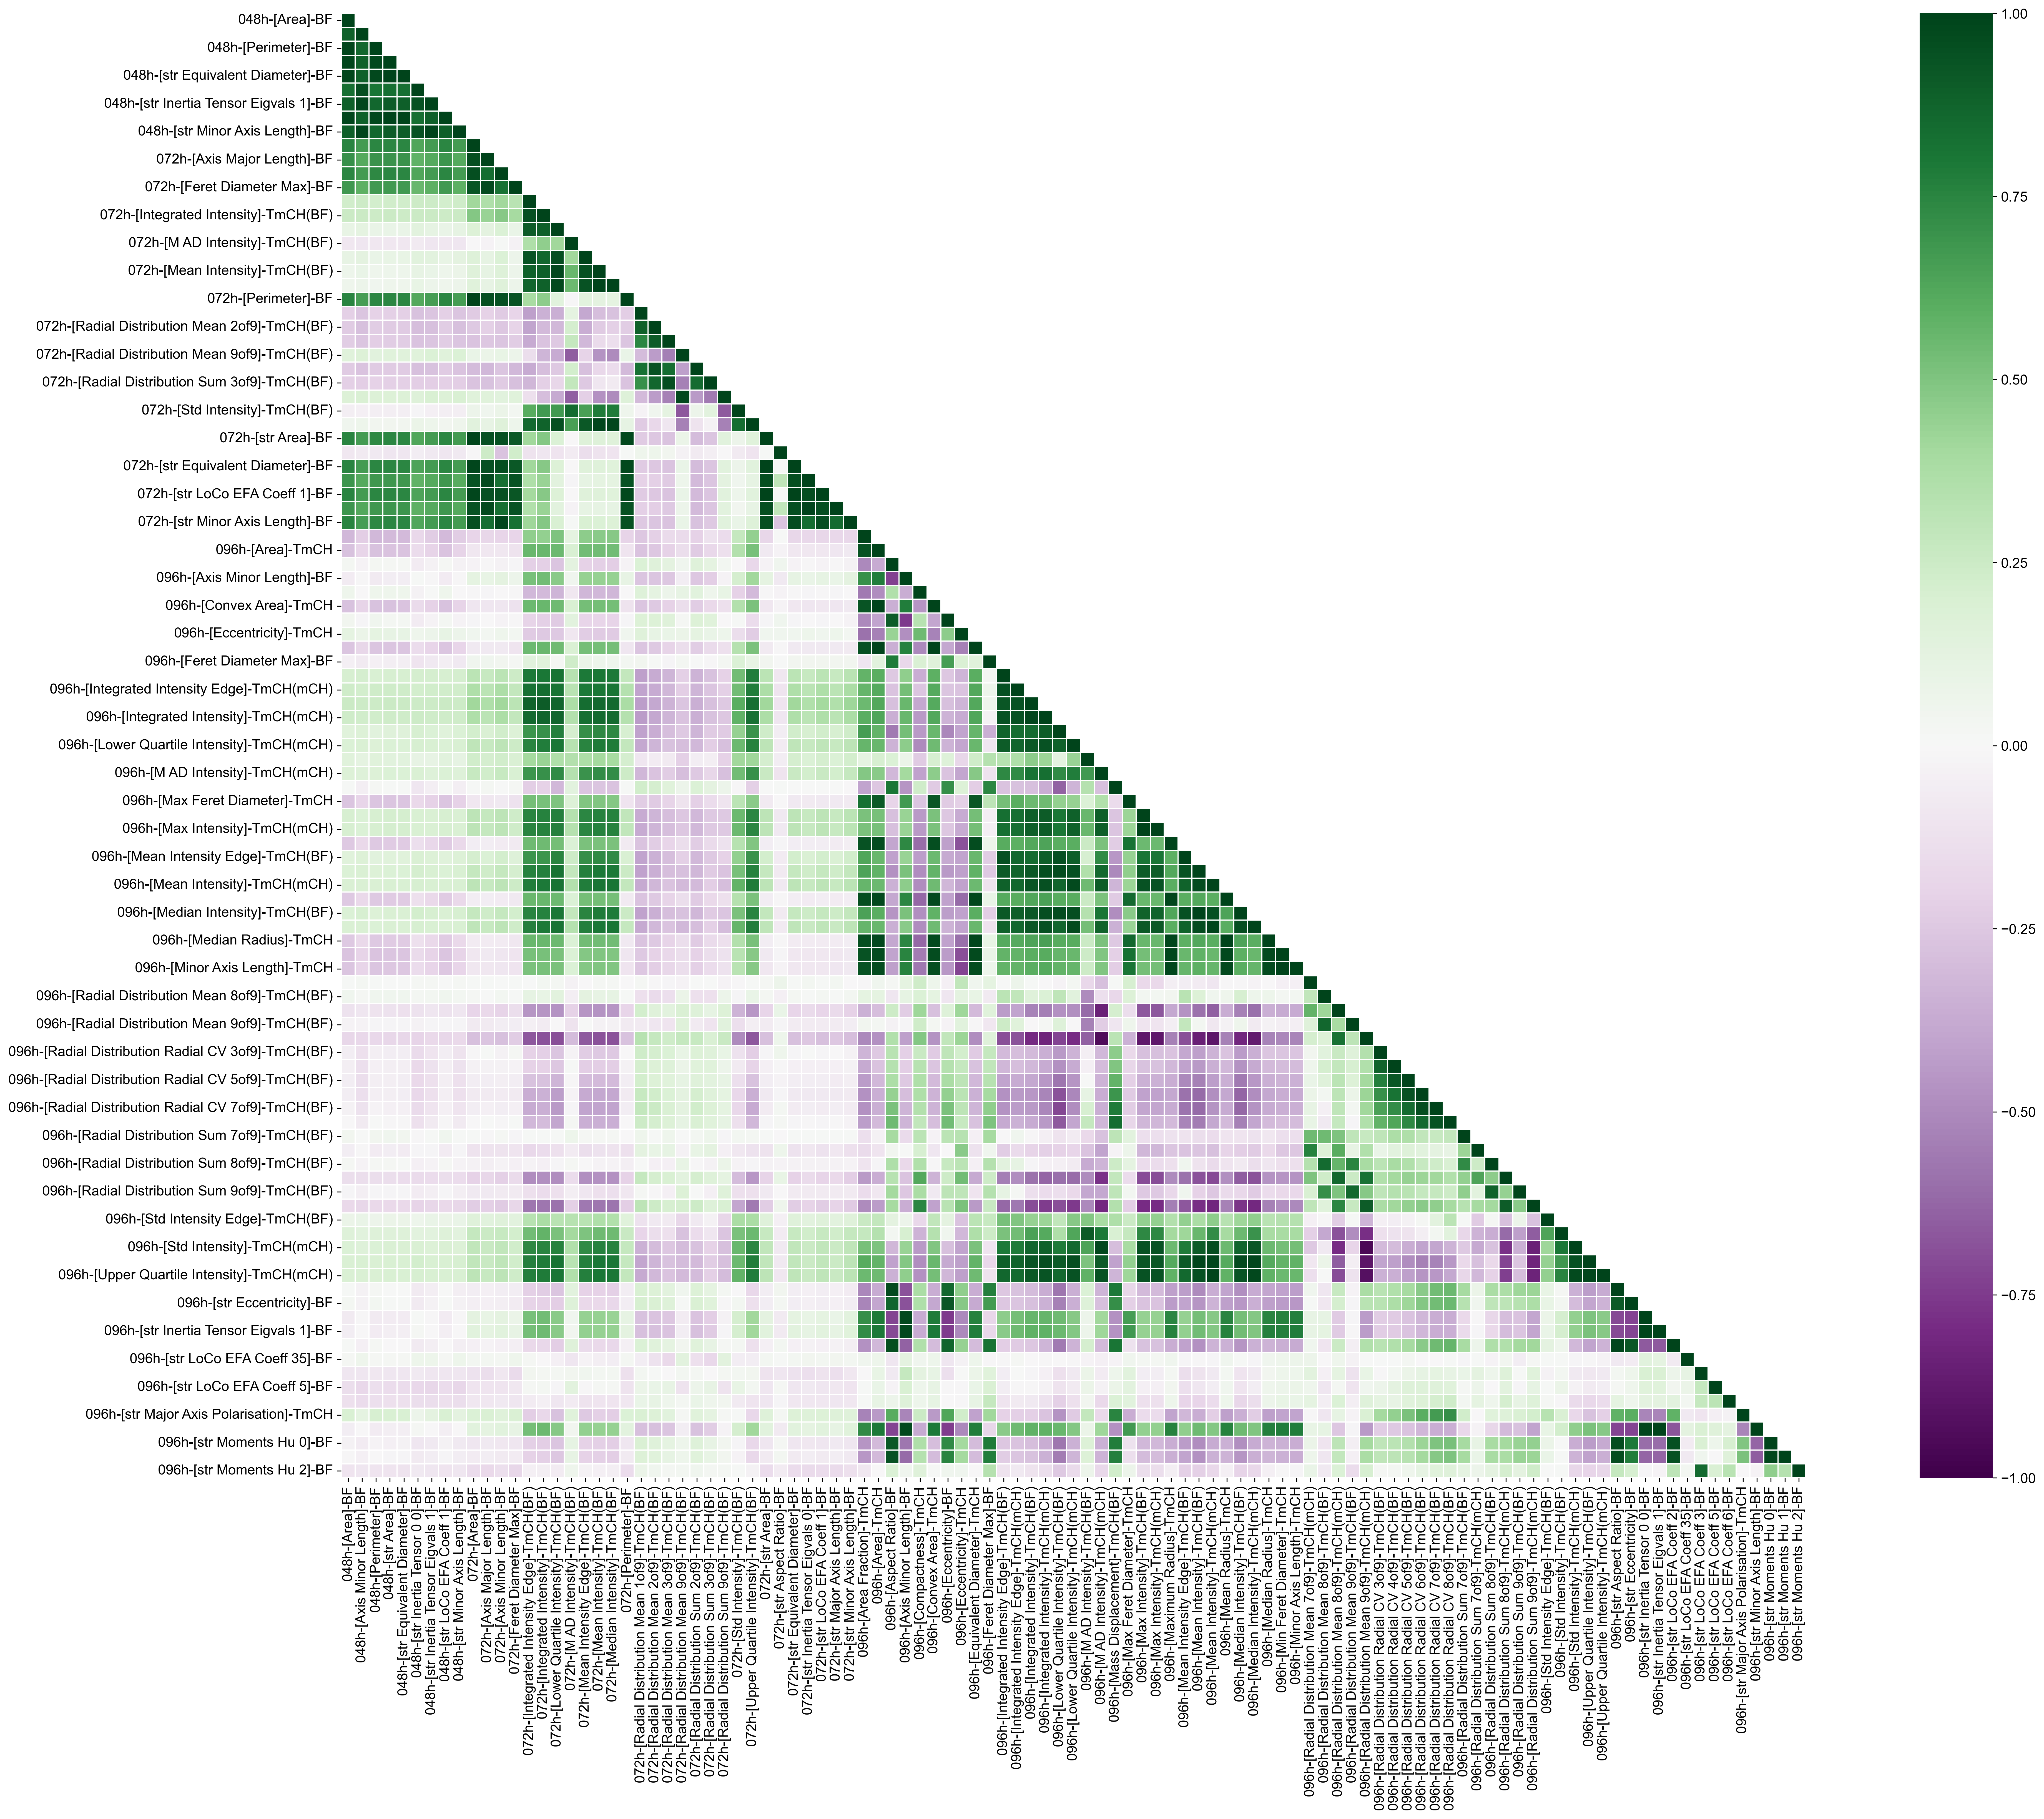

In [10]:
import organoid_prediction_python as opp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"
table_location = home_directory + "tabular_data"

translation_frame = pd.read_csv("translation_dataframe_timepoints.csv")
name_mapping = {key:new_key for key,new_key in zip(translation_frame["original_names"],translation_frame["plot_names"])}

data = pd.read_csv(f"{table_location}/All_Samples_Feature_Space_All_Features_48h,72h,96h_Normalised_per_Timepoint.csv")
annotations = table_location + "/annotations_with_indices.csv"
annotation_df = pd.read_csv(annotations)
mapping = {"Real_Run":"RR", "Trial_Run":"TR"}
annotation_df["Run"] = [mapping[value] for value in annotation_df["Run"].to_numpy()]
no_na_annot = annotation_df[annotation_df["Morph_Class"]!="NA_NA"]

data_annotated = data.set_index(["Run","Plate","ID"]).merge(no_na_annot,on=["Run","Plate","ID"])
dat_morph = data_annotated[data_annotated["Morph"] != "unclassified"]
dat_morph = dat_morph[dat_morph['048h_raw_BF_AreaShape_area'].notna()].dropna(axis=1).dropna()
dat_morph = dat_morph.drop([key for key in dat_morph.keys() if any([term in key for term in ["Location","orientation","_X","_Y","UMAP","PC"]])],axis=1).rename(columns = name_mapping)

main_contributers_axes_and_morph = ['048h-[Area]-BF',
 '048h-[Axis Minor Length]-BF',
 '048h-[Perimeter]-BF',
 '048h-[str Area]-BF',
 '048h-[str Equivalent Diameter]-BF',
 '048h-[str Inertia Tensor 0 0]-BF',
 '048h-[str Inertia Tensor Eigvals 1]-BF',
 '048h-[str LoCo EFA Coeff 1]-BF',
 '048h-[str Minor Axis Length]-BF',
 '072h-[Area]-BF',
 '072h-[Axis Major Length]-BF',
 '072h-[Axis Minor Length]-BF',
 '072h-[Feret Diameter Max]-BF',
 '072h-[Integrated Intensity Edge]-TmCH(BF)',
 '072h-[Integrated Intensity]-TmCH(BF)',
 '072h-[Lower Quartile Intensity]-TmCH(BF)',
 '072h-[M AD Intensity]-TmCH(BF)',
 '072h-[Mean Intensity Edge]-TmCH(BF)',
 '072h-[Mean Intensity]-TmCH(BF)',
 '072h-[Median Intensity]-TmCH(BF)',
 '072h-[Perimeter]-BF',
 '072h-[Radial Distribution Mean 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 9of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 9of9]-TmCH(BF)',
 '072h-[Std Intensity]-TmCH(BF)',
 '072h-[Upper Quartile Intensity]-TmCH(BF)',
 '072h-[str Area]-BF',
 '072h-[str Aspect Ratio]-BF',
 '072h-[str Equivalent Diameter]-BF',
 '072h-[str Inertia Tensor Eigvals 0]-BF',
 '072h-[str LoCo EFA Coeff 1]-BF',
 '072h-[str Major Axis Length]-BF',
 '072h-[str Minor Axis Length]-BF',
 '096h-[Area Fraction]-TmCH',
 '096h-[Area]-TmCH',
 '096h-[Aspect Ratio]-BF',
 '096h-[Axis Minor Length]-BF',
 '096h-[Compactness]-TmCH',
 '096h-[Convex Area]-TmCH',
 '096h-[Eccentricity]-BF',
 '096h-[Eccentricity]-TmCH',
 '096h-[Equivalent Diameter]-TmCH',
 '096h-[Feret Diameter Max]-BF',
 '096h-[Integrated Intensity Edge]-TmCH(BF)',
 '096h-[Integrated Intensity Edge]-TmCH(mCH)',
 '096h-[Integrated Intensity]-TmCH(BF)',
 '096h-[Integrated Intensity]-TmCH(mCH)',
 '096h-[Lower Quartile Intensity]-TmCH(BF)',
 '096h-[Lower Quartile Intensity]-TmCH(mCH)',
 '096h-[M AD Intensity]-TmCH(BF)',
 '096h-[M AD Intensity]-TmCH(mCH)',
 '096h-[Mass Displacement]-TmCH(BF)',
 '096h-[Max Feret Diameter]-TmCH',
 '096h-[Max Intensity]-TmCH(BF)',
 '096h-[Max Intensity]-TmCH(mCH)',
 '096h-[Maximum Radius]-TmCH',
 '096h-[Mean Intensity Edge]-TmCH(BF)',
 '096h-[Mean Intensity]-TmCH(BF)',
 '096h-[Mean Intensity]-TmCH(mCH)',
 '096h-[Mean Radius]-TmCH',
 '096h-[Median Intensity]-TmCH(BF)',
 '096h-[Median Intensity]-TmCH(mCH)',
 '096h-[Median Radius]-TmCH',
 '096h-[Min Feret Diameter]-TmCH',
 '096h-[Minor Axis Length]-TmCH',
 '096h-[Radial Distribution Mean 7of9]-TmCH(mCH)',
 '096h-[Radial Distribution Mean 8of9]-TmCH(BF)',
 '096h-[Radial Distribution Mean 8of9]-TmCH(mCH)',
 '096h-[Radial Distribution Mean 9of9]-TmCH(BF)',
 '096h-[Radial Distribution Mean 9of9]-TmCH(mCH)',
 '096h-[Radial Distribution Radial CV 3of9]-TmCH(BF)',
 '096h-[Radial Distribution Radial CV 4of9]-TmCH(BF)',
 '096h-[Radial Distribution Radial CV 5of9]-TmCH(BF)',
 '096h-[Radial Distribution Radial CV 6of9]-TmCH(BF)',
 '096h-[Radial Distribution Radial CV 7of9]-TmCH(BF)',
 '096h-[Radial Distribution Radial CV 8of9]-TmCH(BF)',
 '096h-[Radial Distribution Sum 7of9]-TmCH(BF)',
 '096h-[Radial Distribution Sum 7of9]-TmCH(mCH)',
 '096h-[Radial Distribution Sum 8of9]-TmCH(BF)',
 '096h-[Radial Distribution Sum 8of9]-TmCH(mCH)',
 '096h-[Radial Distribution Sum 9of9]-TmCH(BF)',
 '096h-[Radial Distribution Sum 9of9]-TmCH(mCH)',
 '096h-[Std Intensity Edge]-TmCH(BF)',
 '096h-[Std Intensity]-TmCH(BF)',
 '096h-[Std Intensity]-TmCH(mCH)',
 '096h-[Upper Quartile Intensity]-TmCH(BF)',
 '096h-[Upper Quartile Intensity]-TmCH(mCH)',
 '096h-[str Aspect Ratio]-BF',
 '096h-[str Eccentricity]-BF',
 '096h-[str Inertia Tensor 0 0]-BF',
 '096h-[str Inertia Tensor Eigvals 1]-BF',
 '096h-[str LoCo EFA Coeff 2]-BF',
 '096h-[str LoCo EFA Coeff 35]-BF',
 '096h-[str LoCo EFA Coeff 3]-BF',
 '096h-[str LoCo EFA Coeff 5]-BF',
 '096h-[str LoCo EFA Coeff 6]-BF',
 '096h-[str Major Axis Polarisation]-TmCH',
 '096h-[str Minor Axis Length]-BF',
 '096h-[str Moments Hu 0]-BF',
 '096h-[str Moments Hu 1]-BF',
 '096h-[str Moments Hu 2]-BF']

corr_analysis = dat_morph[main_contributers_axes_and_morph].corr()
fig,ax = plt.subplots(1,1,figsize = (30,22))

mask = np.ones(corr_analysis.shape, dtype= bool)
mask = np.triu(mask, k = 1)

sns.heatmap(corr_analysis, cmap = "PRGn",vmin=-1, vmax=1, xticklabels='auto', yticklabels='auto', mask=mask, ax=ax,linewidths=0.5,square = True)
ax.set_facecolor('white')

plt.tight_layout()
plt.show()

In [12]:
correlation_path = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\tabular_data\Correlation of PLSR Axes and Morph loadings 0.05 quantile.xlsx"
corr_analysis.to_excel(correlation_path)

In [22]:
def index_to_excel_column(index):
    col_name = ""
    while index >= 0:
        remainder = index % 26
        col_name = chr(65 + remainder) + col_name
        index = index // 26 - 1
    return col_name

# Function to convert a matplotlib color to an Excel-compatible color
def rgb_to_excel_color(rgb):
    return "{:02X}{:02X}{:02X}".format(int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))

# Get min and max values for normalization
min_value = -1.1
max_value = 1.1

# Create a colormap (PRGn)
cmap = plt.get_cmap('PRGn')

# Re-open the Excel file to apply colormap
book = openpyxl.load_workbook(correlation_path)
sheet = book.active

# Apply the colormap to cells
for i in range(len(corr_analysis.keys())):
    column = index_to_excel_column(i+1)
    for row in range(2, len(table) + 2):  # Excel is 1-indexed; skip the header row
        cell = f"{column}{row}"
        value = sheet[cell].value
        
        # Normalize the value
        normalized_value = (value - min_value) / (max_value - min_value)
        
        # Get the color from the colormap
        rgba = cmap(normalized_value)
        
        # Apply the color to the cell
        fill = PatternFill(start_color=rgb_to_excel_color(rgba[:3]),
                           end_color=rgb_to_excel_color(rgba[:3]), fill_type="solid")
        sheet[cell].fill = fill
        
        # Make text grey
        sheet[cell].font = openpyxl.styles.Font(color='000000')

# Save the changes
out_path_corr = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\tabular_data\Correlation of PLSR Axes and Morph loadings 0.05 quantile coloured.xlsx"
book.save(out_path_corr)

In [18]:
corr_analysis

,048h-[Area]-BF,048h-[Axis Minor Length]-BF,048h-[Perimeter]-BF,048h-[str Area]-BF,048h-[str Equivalent Diameter]-BF,048h-[str Inertia Tensor 0 0]-BF,048h-[str Inertia Tensor Eigvals 1]-BF,048h-[str LoCo EFA Coeff 1]-BF,048h-[str Minor Axis Length]-BF,072h-[Area]-BF,...,096h-[str LoCo EFA Coeff 2]-BF,096h-[str LoCo EFA Coeff 35]-BF,096h-[str LoCo EFA Coeff 3]-BF,096h-[str LoCo EFA Coeff 5]-BF,096h-[str LoCo EFA Coeff 6]-BF,096h-[str Major Axis Polarisation]-TmCH,096h-[str Minor Axis Length]-BF,096h-[str Moments Hu 0]-BF,096h-[str Moments Hu 1]-BF,096h-[str Moments Hu 2]-BF
048h-[Area]-BF,1.000000,0.889994,0.989364,0.992020,0.991925,0.832230,0.892092,0.991542,0.892487,0.755193,...,0.009506,0.021901,-0.095352,-0.144750,-0.132190,0.199218,-0.059249,-0.031871,-0.013340,-0.106251
048h-[Axis Minor Length]-BF,0.889994,1.000000,0.864356,0.888994,0.889394,0.954252,0.988557,0.884605,0.989017,0.667039,...,-0.039419,0.059055,-0.100721,-0.177965,-0.152692,0.121048,-0.005790,-0.068460,-0.046214,-0.097070
048h-[Perimeter]-BF,0.989364,0.864356,1.000000,0.979067,0.979451,0.809902,0.865562,0.979628,0.866161,0.745715,...,0.015712,0.020767,-0.092089,-0.140072,-0.138393,0.206293,-0.065181,-0.025632,-0.007422,-0.105119
048h-[str Area]-BF,0.992020,0.888994,0.979067,1.000000,0.999673,0.832957,0.898490,0.999498,0.898800,0.749341,...,-0.002515,0.023046,-0.098475,-0.155010,-0.131135,0.199703,-0.051682,-0.040099,-0.021593,-0.108865
048h-[str Equivalent Diameter]-BF,0.991925,0.889394,0.979451,0.999673,1.000000,0.833191,0.898166,0.999763,0.899013,0.748314,...,-0.001821,0.021682,-0.100510,-0.155191,-0.130179,0.199550,-0.051969,-0.038977,-0.019890,-0.110106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
096h-[str Major Axis Polarisation]-TmCH,0.199218,0.121048,0.206293,0.199703,0.199550,0.070993,0.132400,0.199443,0.132494,0.183587,...,0.582182,-0.083170,-0.101688,-0.050974,-0.034930,1.000000,-0.520568,0.495977,0.508709,-0.004042
096h-[str Minor Axis Length]-BF,-0.059249,-0.005790,-0.065181,-0.051682,-0.051969,0.021657,-0.000980,-0.053303,-0.002210,0.145687,...,-0.672513,0.125359,0.187540,0.157832,0.127371,-0.520568,1.000000,-0.625417,-0.649488,-0.028680
096h-[str Moments Hu 0]-BF,-0.031871,-0.068460,-0.025632,-0.040099,-0.038977,-0.097541,-0.079750,-0.037742,-0.078639,-0.095420,...,0.949001,-0.064724,0.188212,0.063807,0.207191,0.495977,-0.625417,1.000000,0.987854,0.455533
096h-[str Moments Hu 1]-BF,-0.013340,-0.046214,-0.007422,-0.021593,-0.019890,-0.077359,-0.059595,-0.018955,-0.057766,-0.069528,...,0.948581,-0.078264,0.050617,-0.000575,0.158313,0.508709,-0.649488,0.987854,1.000000,0.338807


In [20]:
table

,Feature,Dev. Dim 1,Dev. Dim 2,Axes Dim 1,Axes Dim 2
0,048h-[Area]-BF,-0.010752,-0.176405,0.013635,0.101492
1,048h-[Axis Minor Length]-BF,-0.003878,-0.175573,-0.002855,0.069923
2,048h-[Perimeter]-BF,-0.011610,-0.173988,0.016211,0.099767
3,048h-[str Area]-BF,-0.010123,-0.175414,0.012668,0.099994
4,048h-[str Equivalent Diameter]-BF,-0.010006,-0.175640,0.012238,0.099746
...,...,...,...,...,...
100,096h-[str Major Axis Polarisation]-TmCH,-0.059780,0.008105,0.096972,0.116570
101,096h-[str Minor Axis Length]-BF,0.105818,-0.015793,-0.130667,-0.055667
102,096h-[str Moments Hu 0]-BF,-0.069960,0.069371,0.104502,0.047573
103,096h-[str Moments Hu 1]-BF,-0.068427,0.063019,0.103416,0.059637


In [24]:
plsr_72h_path = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\tabular_data\PLSR Axes and Morph early features loadings 0.05 quantile.xlsx"

dataframe_72h_loadings = pd.read_excel(plsr_72h_path)

# Re-open the Excel file to apply colormap
book = openpyxl.load_workbook(plsr_72h_path)
sheet = book.active

# Get min and max values for normalization
min_value = -0.34
max_value = 0.34

# Apply the colormap to cells
for column in ['B', 'C','D','E']:
    for row in range(2, len(dataframe_72h_loadings) + 2):  # Excel is 1-indexed; skip the header row
        cell = f"{column}{row}"
        value = sheet[cell].value
        
        # Normalize the value
        normalized_value = (value - min_value) / (max_value - min_value)
        
        # Get the color from the colormap
        rgba = cmap(normalized_value)
        
        # Apply the color to the cell
        fill = PatternFill(start_color=rgb_to_excel_color(rgba[:3]),
                           end_color=rgb_to_excel_color(rgba[:3]), fill_type="solid")
        sheet[cell].fill = fill
        
        # Make text grey
        sheet[cell].font = openpyxl.styles.Font(color='000000')

# Save the changes
out_plsr_72h_path = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\tabular_data\PLSR Axes and Morph early features loadings 0.05 quantile colours.xlsx"
book.save(out_plsr_72h_path)